# **Montagem do Drive**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Instalação de Dependências**

In [10]:
!pip -q install ultralytics #Instalação do Ultralytics (YOLOv8).

In [11]:
!pip -q install streamlit #Instalação do Streamlit.

In [19]:
!pip -q install paddleocr #Dependência para o OCR.

# **Download do Dataset (OPCIONAL)**

In [ ]:
import gdown
import zipfile
import os

#URL do Dataset.
url = 'https://app.roboflow.com/ds/Nxj1GPwt2W?key=dwOjvRHjXV'

#Especificação do arquivo desejado.
file_path = 'dataset.zip'

#Download do arquivo.
gdown.download(url, file_path, quiet=False)

#Função de Extração.
def extract_zip(file_path, extract_to):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

#Função de checagem do Dataset.
if zipfile.is_zipfile(file_path):
    #Extração do conteúdo compactado.
    main_extract_path = 'dataset'
    extract_zip(file_path, main_extract_path)

    os.remove(file_path)

    for item in os.listdir(main_extract_path):
        item_path = os.path.join(main_extract_path, item)

        #Re-checagem da extração do Dataset.
        if zipfile.is_zipfile(item_path):
            #Extração do conteúdo compactado.
            extract_zip(item_path, main_extract_path)
            os.remove(item_path)
else:
    print("O arquivo desejado não é um arquivo zip.")

Downloading...
From: https://app.roboflow.com/ds/Nxj1GPwt2W?key=dwOjvRHjXV
To: /content/dataset.zip
100%|██████████| 607M/607M [00:34<00:00, 17.8MB/s]


# **Organização de Dataset (OPCIONAL)**

In [ ]:
import os
import shutil
from concurrent.futures import ThreadPoolExecutor

def copy_files(src_dir, dst_dir):
    """Copy files from src_dir to dst_dir."""
    os.makedirs(dst_dir, exist_ok=True)
    for file in os.listdir(src_dir):
        shutil.copy(os.path.join(src_dir, file), os.path.join(dst_dir, file))

def process_folder(inputPar, outPar, folder):
    """Process 'images' and 'labels' subfolders within the given folder."""
    inputChild = os.path.join(inputPar, folder)

    for subfldr in ["images", "labels"]:
        inputSubChild = os.path.join(inputChild, subfldr)
        outChild = os.path.join(outPar, subfldr, folder)

        if os.path.exists(inputSubChild):
            copy_files(inputSubChild, outChild)

def main():
    cPath = os.getcwd()
    inputPar = os.path.join(cPath, "dataset")
    outPar = os.path.join(cPath, "data")

    folders = ["train", "valid", "test"]

    with ThreadPoolExecutor() as executor:
        executor.map(lambda folder: process_folder(inputPar, outPar, folder), folders)

if __name__ == "__main__":
    main()

#**Inferência com OCR**


image 1/1 /content/drive/MyDrive/dataset_carplate/test/images/N129_jpeg.rf.a9b5e0212c304cea0dda69b1d92750db.jpg: 640x640 1 num_plate, 222.3ms
Speed: 7.0ms preprocess, 222.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
[     239.07      349.73      415.31      400.18]


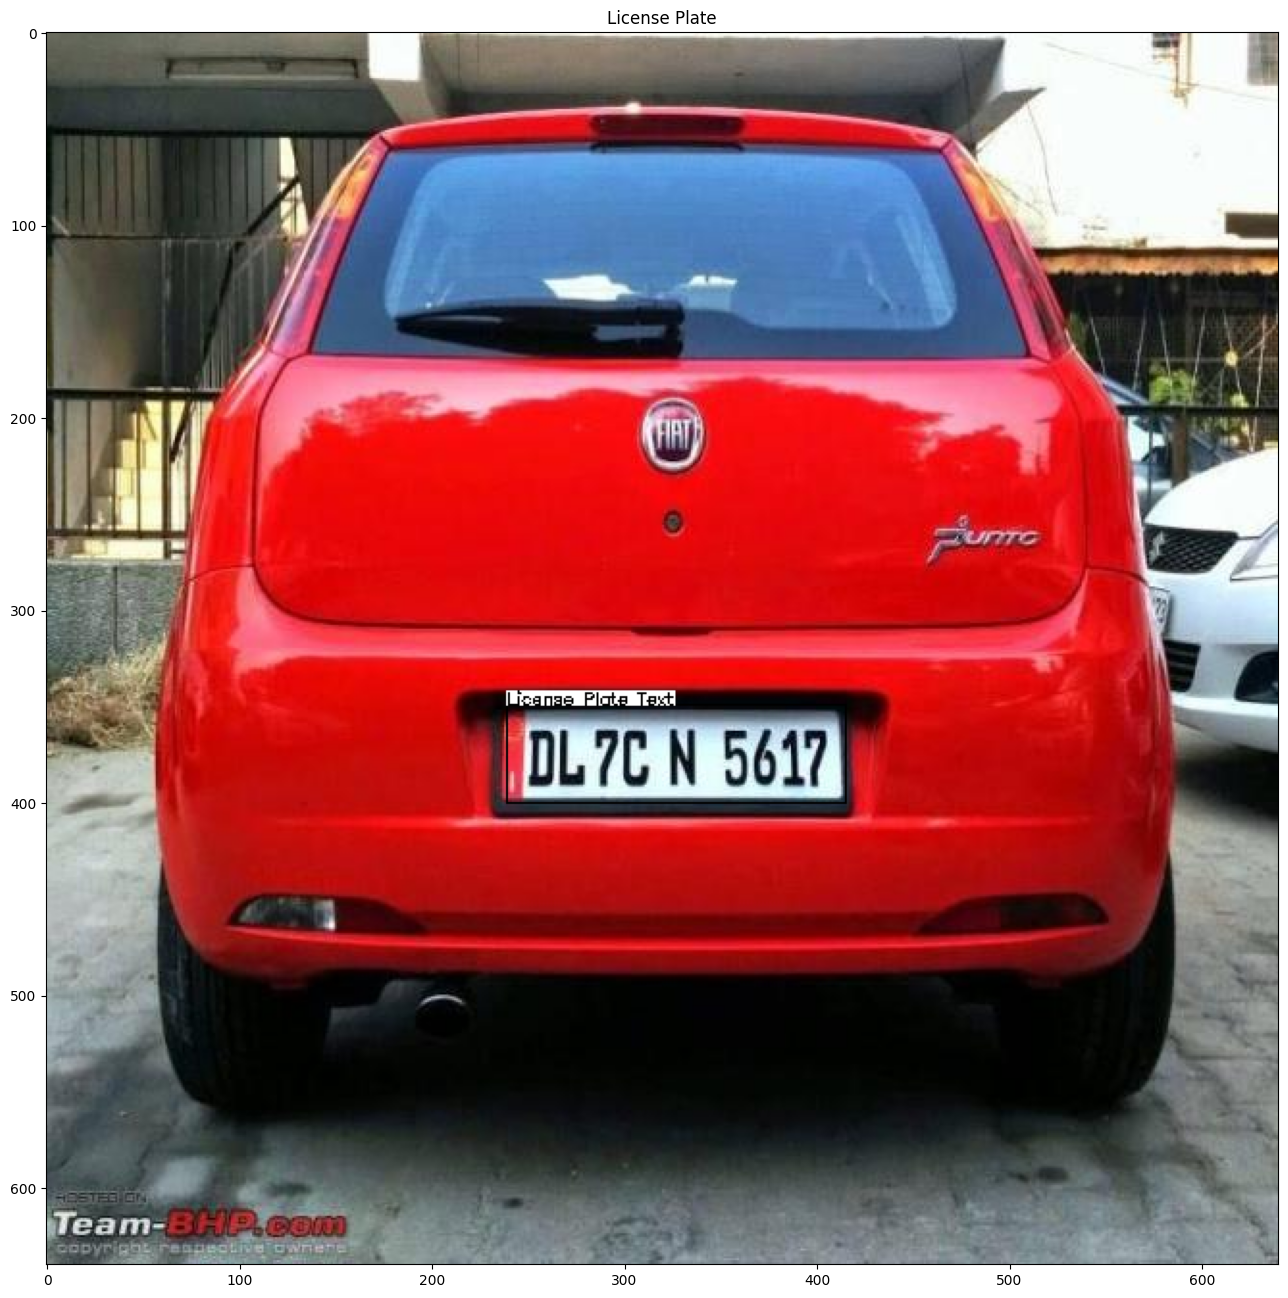

In [16]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def imshow(title="Image", image=None, size=16):
    h, w = image.shape[:2]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

model = YOLO('/content/drive/MyDrive/Models/car_plateDetection2/weights/yolo.pt')

#Caminho da imagem para inferência.
image_path = '/content/drive/MyDrive/dataset_carplate/test/images/N129_jpeg.rf.a9b5e0212c304cea0dda69b1d92750db.jpg'

#Detecção com o Modelo YOLOv8.
results = model(image_path)

#Extrair caixas delimitadoras e recortar as placas.
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  #Recuperar as caixas delimitadoras.
    img = cv2.imread(image_path)

    for box in boxes:
        print(box)
        x1, y1, x2, y2 = map(int, box)
        plate = img[y1:y2, x1:x2]

        label = 'License Plate Text'
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 1)
        text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1)[0]
        cv2.rectangle(img, (x1, y1 - text_size[1]), (x1 + text_size[0], y1), (255, 255, 255), -1)
        cv2.putText(img, label, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), 1)
        imshow('License Plate', img)

# **Site no Streamlit**

**Iniciar App Streamlit pelo Colab**

Instalação do Serviço de Tunel

In [17]:
!npm -q install localtunnel #Este instalará as dependências do serviço de túnel.


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


Início do App com retorno de URL

In [20]:
!streamlit run /content/drive/MyDrive/plateDetection.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com #Este rodará o app streamlit na web e retornará o IP de acesso.

35.194.32.184
your url is: https://rare-pens-run.loca.lt
